# Used Car Price Prediction using Machine Learning Algorithms
In this project, we use various supervised and unsupervised ML models to predict the price of used cars.
This provides a good framework for fairness and transparency between vendors and buyers of used cars.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# File IO
import gdown

# Regression libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

# ANN Libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Download file from a url
file_path = 'car_sales_data.csv'

# Download the file from Google Drive
gdown.download('https://drive.google.com/uc?id=1rgUj7mlDQy0fXaIbNytc-nyvGP_P1qiN', file_path)

Downloading...
From: https://drive.google.com/uc?id=1rgUj7mlDQy0fXaIbNytc-nyvGP_P1qiN
To: /content/car_sales_data.csv
100%|██████████| 1.93M/1.93M [00:00<00:00, 16.4MB/s]


'car_sales_data.csv'

In [ ]:
# Read the downloaded file into a DataFrame
car_sales_df = pd.read_csv(file_path)

# Display the head of the DataFrame
car_sales_df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


### Data exploration

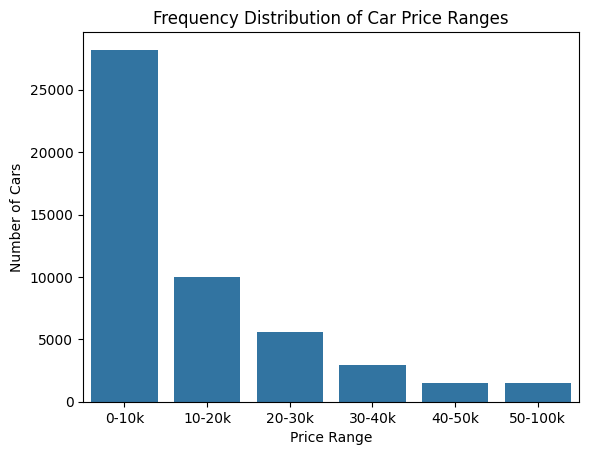

In [ ]:
# Plot a histogram showing the price distribution of the cars in the dataset
# Create a new column for car price ranges
car_sales_df['Price_Range'] = pd.cut(car_sales_df['Price'], bins=[0, 10000, 20000, 30000, 40000, 50000, 100000], labels=['0-10k', '10-20k', '20-30k', '30-40k', '40-50k', '50-100k'])

# Count the number of cars in each price range
price_range_counts = car_sales_df['Price_Range'].value_counts()

# Create a bar chart of the price range counts
sns.barplot(x=price_range_counts.index, y=price_range_counts.values)
plt.xlabel('Price Range')
plt.ylabel('Number of Cars')
plt.title('Frequency Distribution of Car Price Ranges')
plt.show()

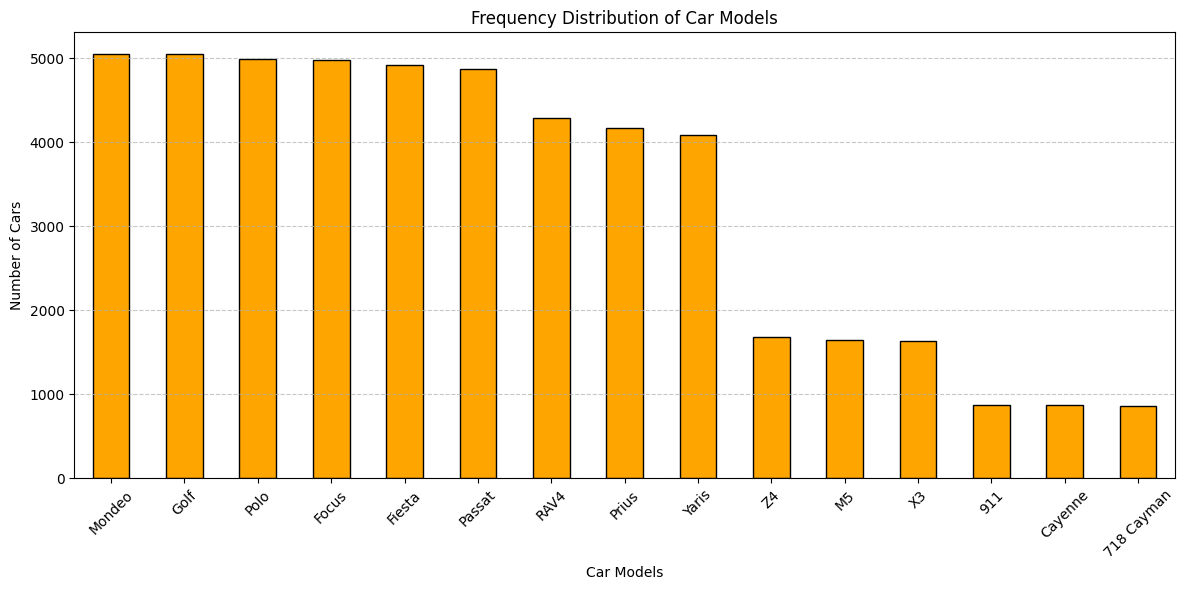

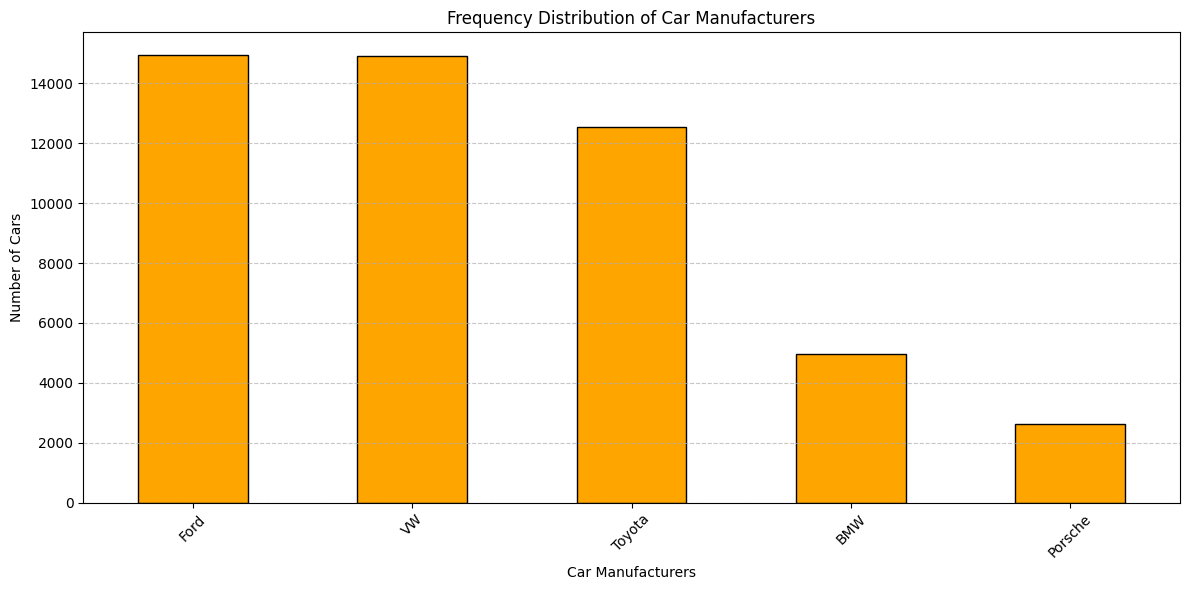

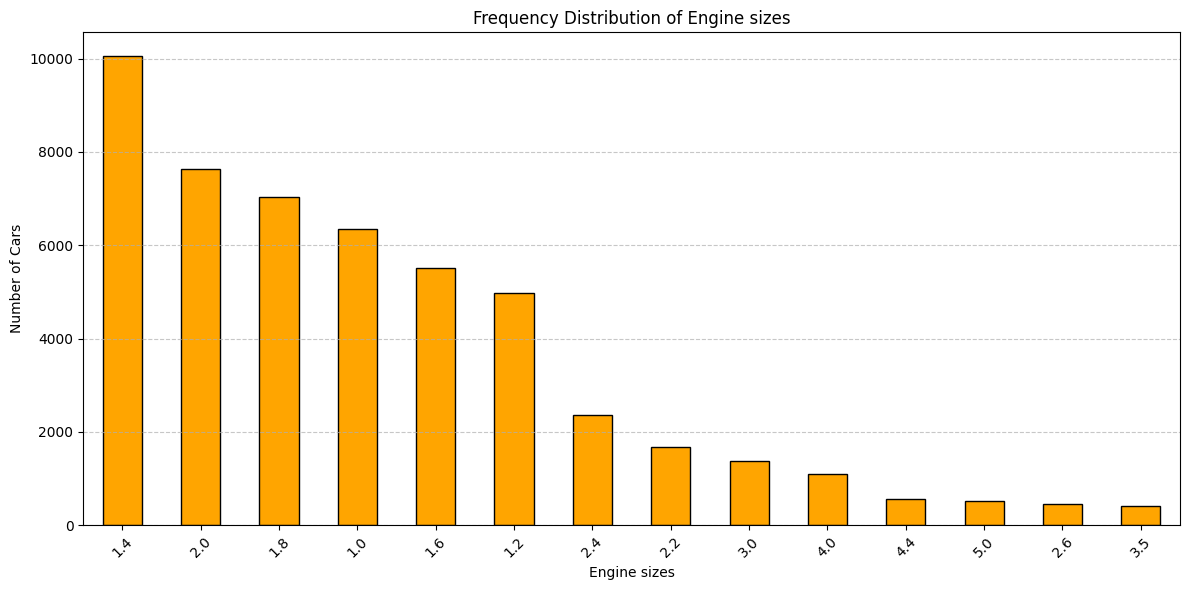

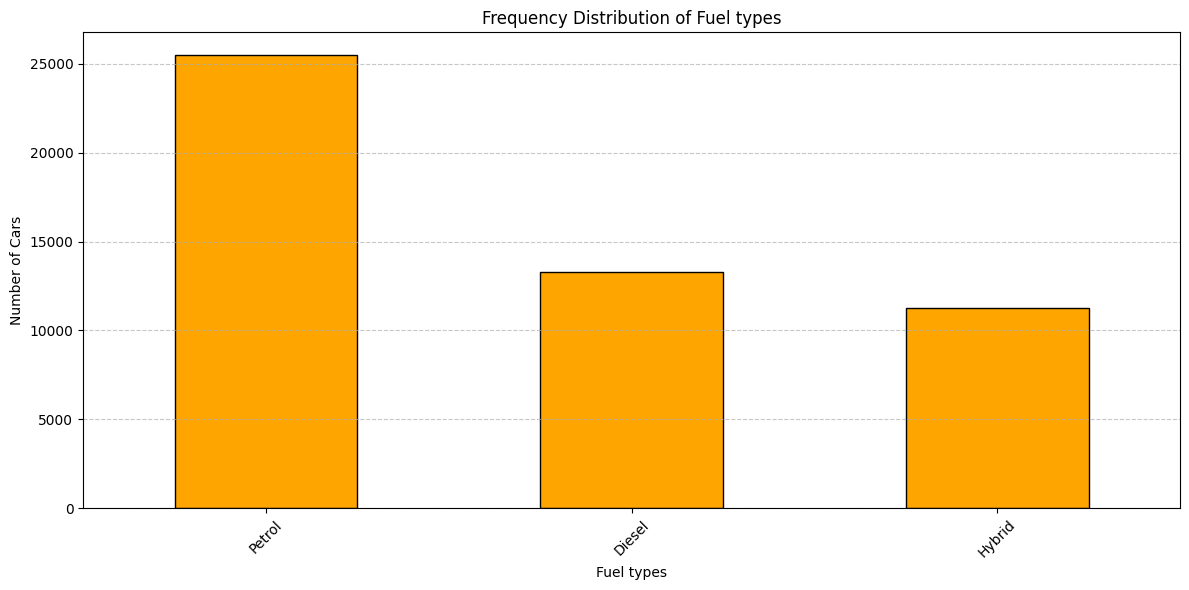

In [ ]:
# Function to create and display the frequency distribution plot
def plot_frequency_distribution(data, column, title):
    # Get the value counts (frequencies) of unique values
    value_counts = data[column].value_counts()

    plt.figure(figsize=(12, 6))
    value_counts.plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f'Frequency Distribution of {title}')
    plt.xlabel(title)
    plt.ylabel('Number of Cars')
    plt.xticks(rotation=45)  # Rotate labels for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot for Model
plot_frequency_distribution(car_sales_df, 'Model', 'Car Models')

# Plot for Manufacturer
plot_frequency_distribution(car_sales_df, 'Manufacturer', 'Car Manufacturers')

# Plot for Engine size
plot_frequency_distribution(car_sales_df, 'Engine size', 'Engine sizes')

# Plot for Fuel type
plot_frequency_distribution(car_sales_df, 'Fuel type', 'Fuel types')

## Task 1a: Comparing regression models that predict car price with a single numerical input.



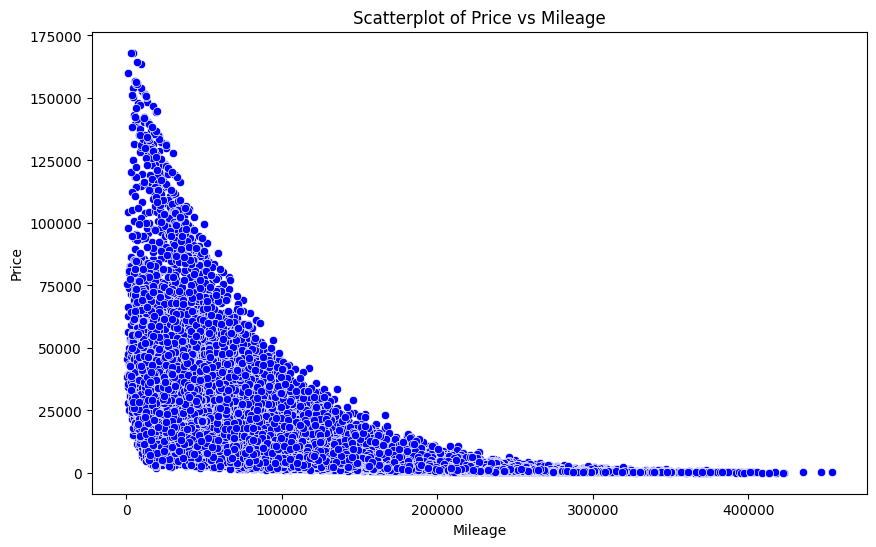

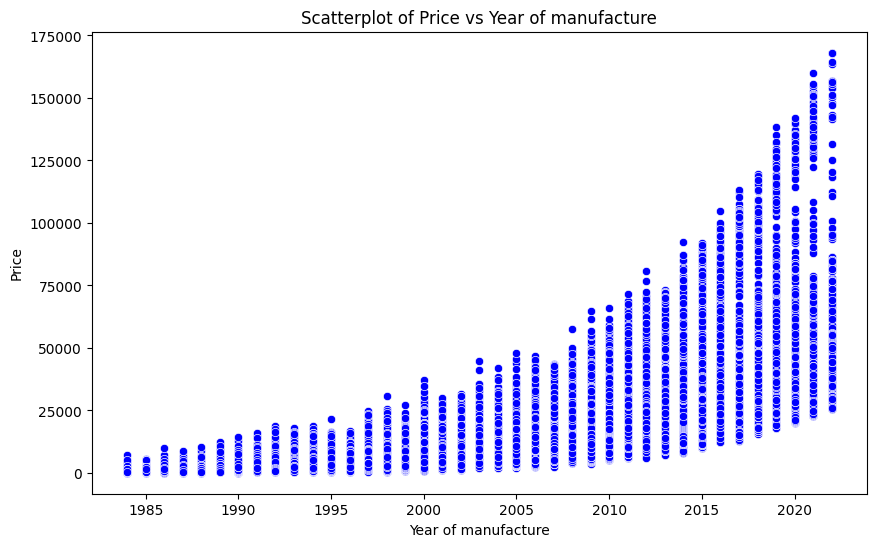

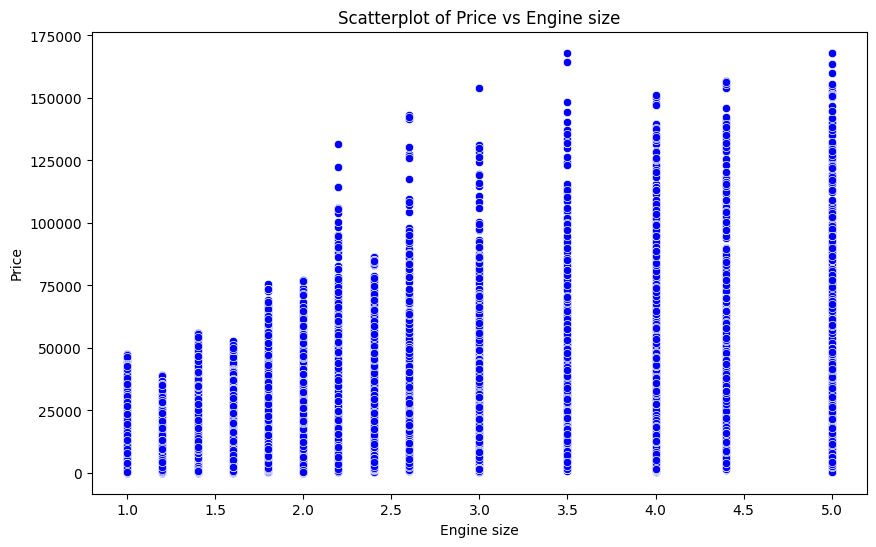

In [ ]:
# Function to generate scatterplots for various numerical features with price
def generate_scatterplot(data, x_feature, y_feature='Price'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_feature, y=y_feature, color='blue')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Scatterplot of {y_feature} vs {x_feature}')
    plt.show()

generate_scatterplot(car_sales_df, 'Mileage')
generate_scatterplot(car_sales_df, 'Year of manufacture')
generate_scatterplot(car_sales_df, 'Engine size')

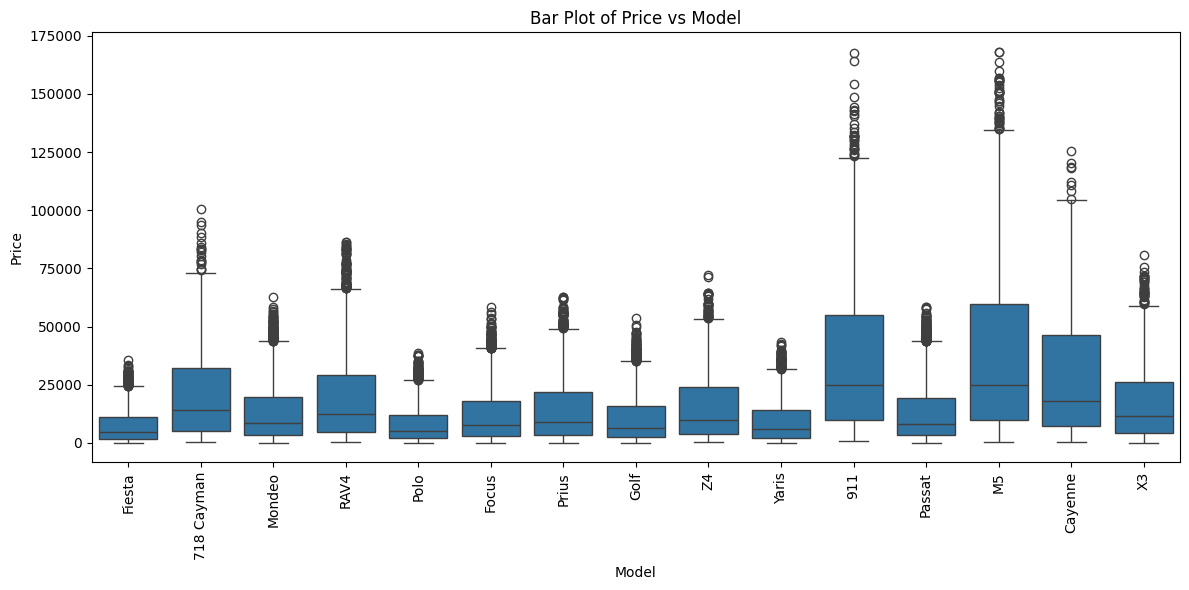

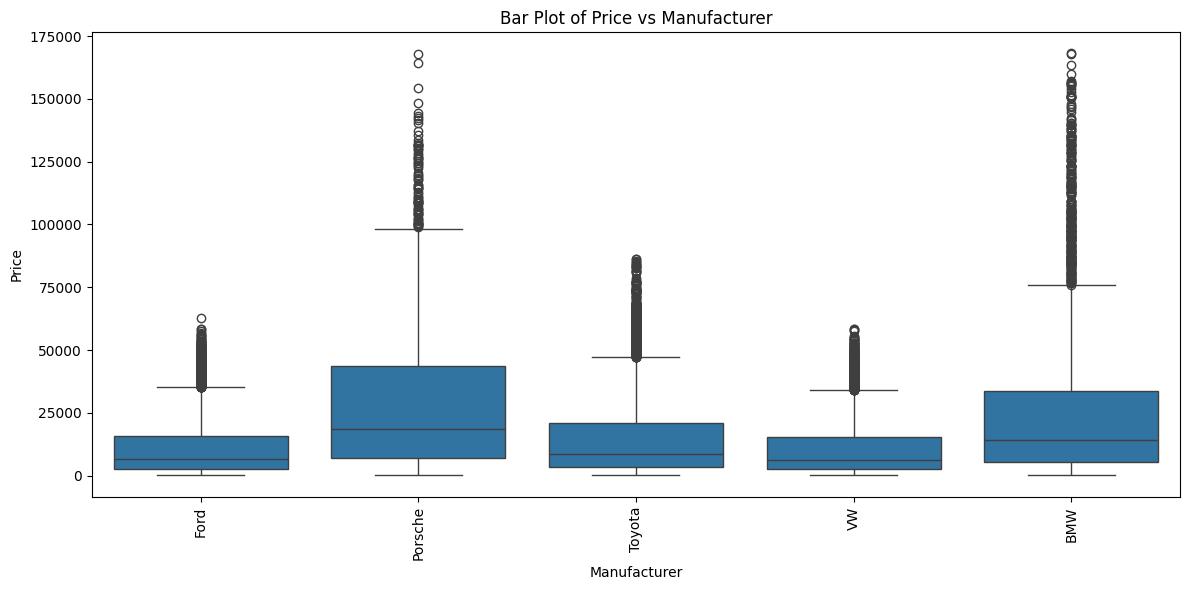

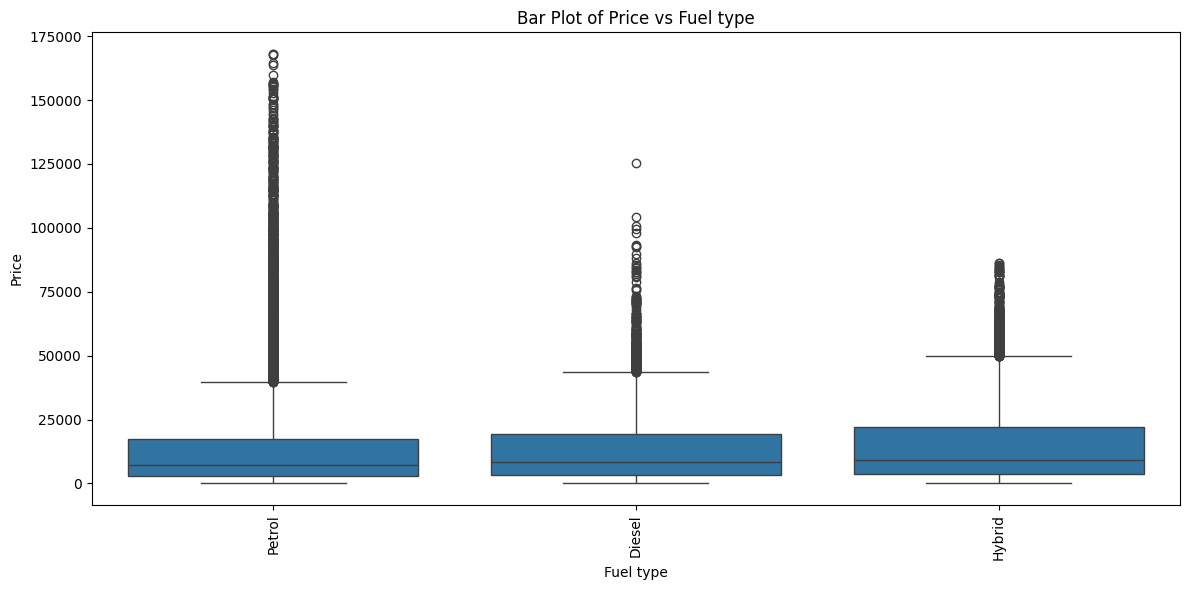

In [ ]:
# Function to generate box plots for categorical variables
def plot_categorical_vs_price(data, category):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=category, y='Price')
    plt.xlabel(category)
    plt.ylabel('Price')
    plt.title(f'Bar Plot of Price vs {category}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# For Model
plot_categorical_vs_price(car_sales_df, 'Model')

# For Manufacturer
plot_categorical_vs_price(car_sales_df, 'Manufacturer')

# For Fuel type
plot_categorical_vs_price(car_sales_df, 'Fuel type')

### Use a heat map to check correlation coefficients

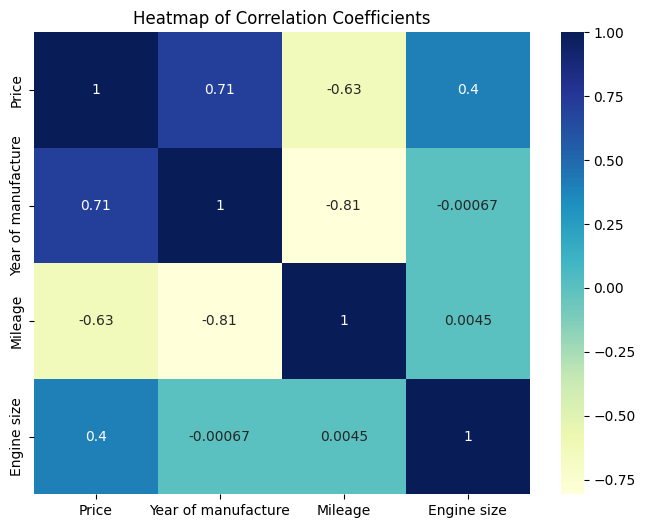

In [ ]:
plt.figure(figsize=(8, 6)) # Set figure size to get a square

numerical_columns = ["Price", "Year of manufacture", "Mileage", 'Engine size'] # Select numerical columns

sns.heatmap(car_sales_df[numerical_columns].corr(), annot=True, cmap='YlGnBu')
plt.title('Heatmap of Correlation Coefficients')
plt.show()

Strongest correlations are between:
1. Price and year of manufacture (0.71)
2. Price and mileage (-0.63)

## Linear regression with single variables
Define functions to prepare data, train and evaluate the model, and visualise the results


In [ ]:
# Function to prepare and split the data into training and testing sets
def prepare_data(car_sales_df, feature, target='Price', test_size=0.2, random_seed=42):
    X = car_sales_df[feature].values.reshape(-1, 1)
    y = car_sales_df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")
    return X_train, X_test, y_train, y_test

# Function to scale the input features using StandardScaler
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

# Function to train a linear regression model
def train_model(X_train_scaled, y_train):
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    return model

# Function to print the coefficients of the linear regression model
def print_model_coefficients(model, feature, target):
    slope = model.coef_[0]
    intercept = model.intercept_
    print(f"\nLinear Regression Results for {feature} vs {target}:")
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")

# Function to evaluate the model using various metrics
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("\nModel Evaluation Metrics:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared Score: {r2:.4f}")
    return mae, mse, rmse, r2

# Function to visualize the data and the fitted regression line
def visualize_model(car_sales_df, feature, target, model, scaler, scatter_color='purple', line_color='green'):
    # Generate points for the regression line
    min_value, max_value = car_sales_df[feature].min(), car_sales_df[feature].max()
    x_fit = np.arange(min_value, max_value, (max_value - min_value)/100).reshape(-1, 1)
    x_fit_scaled = scaler.transform(x_fit)
    y_fit = model.predict(x_fit_scaled)

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y=target, data=car_sales_df, color=scatter_color, alpha=0.6)
    plt.plot(x_fit, y_fit, color=line_color, linewidth=2, label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{target} vs {feature} with Regression Line")
    plt.legend()
    plt.show()

Training set: 40000 samples
Testing set: 10000 samples

Linear Regression Results for Year of manufacture vs Price:
Slope: 11736.7978
Intercept: 13826.7610

Model Evaluation Metrics:
Mean Absolute Error: 7065.09
Mean Squared Error: 128237714.33
Root Mean Squared Error: 11324.21
R-squared Score: 0.5153


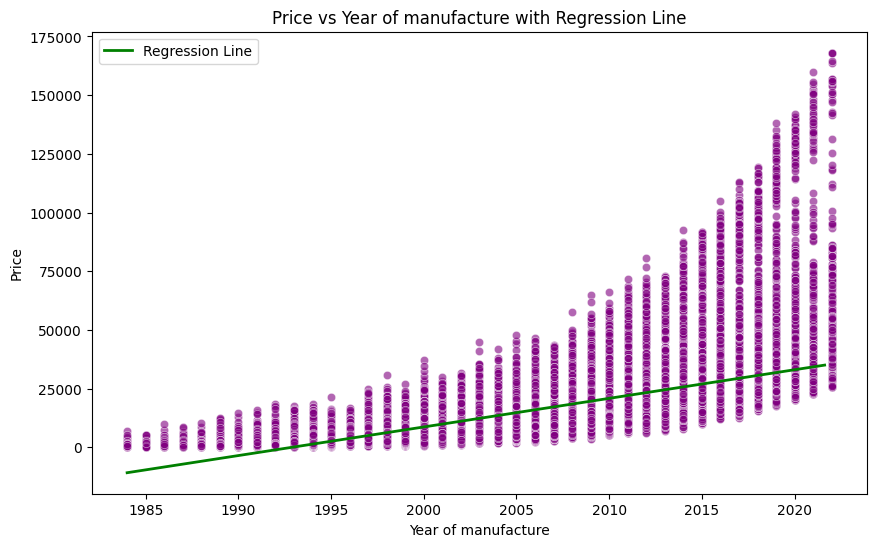



Training set: 40000 samples
Testing set: 10000 samples

Linear Regression Results for Mileage vs Price:
Slope: -10389.7236
Intercept: 13826.7610

Model Evaluation Metrics:
Mean Absolute Error: 7951.63
Mean Squared Error: 156961430.15
Root Mean Squared Error: 12528.42
R-squared Score: 0.4068


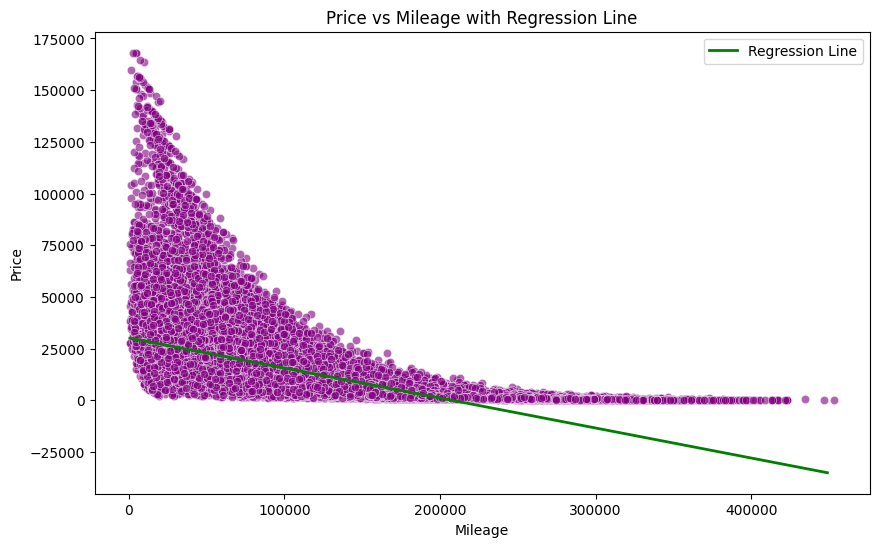



Training set: 40000 samples
Testing set: 10000 samples

Linear Regression Results for Engine size vs Price:
Slope: 6525.1944
Intercept: 13826.7610

Model Evaluation Metrics:
Mean Absolute Error: 10709.26
Mean Squared Error: 221052414.64
Root Mean Squared Error: 14867.83
R-squared Score: 0.1645


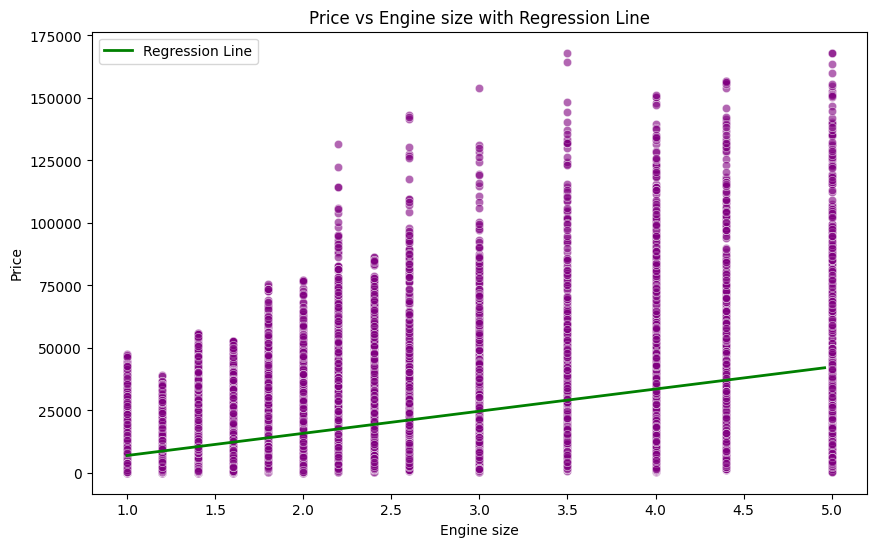

In [ ]:
# Main function to build, evaluate, and visualize a linear regression model
def build_evaluate_and_visualize_linear_model(car_sales_df, feature, target='Price', test_size=0.2, random_seed=35, scatter_color='purple', line_color='green'):
    # Prepare and split the data
    X_train, X_test, y_train, y_test = prepare_data(car_sales_df, feature, target, test_size, random_seed)

    # Scale the data
    X_train_scaled, X_test_scaled, scaler = scale_data(X_train, X_test)

    # Train the model
    model = train_model(X_train_scaled, y_train)

    # Print model coefficients
    print_model_coefficients(model, feature, target)

    # Evaluate the model
    metrics = evaluate_model(model, X_test_scaled, y_test)

    # Visualize the results
    visualize_model(car_sales_df, feature, target, model, scaler, scatter_color, line_color)

    return model, scaler, (X_train_scaled, X_test_scaled, y_train, y_test), metrics

# Call the main function and pass in all numerical variables
numerical_features = ["Year of manufacture", "Mileage", "Engine size"]

for feature in numerical_features:
    model, scaler, data_split, metrics = build_evaluate_and_visualize_linear_model(car_sales_df, feature)
    print("\n" + "="*50 + "\n")

## Build Polynomial Regression Models for all numerical data

Polynomial regression of different degrees for all numerical data

In [ ]:
# Function to prepare and split the data
def prepare_and_split_data(car_sales_df, feature_names, target_name="Price", test_size=0.2, random_seed=26):
    X = car_sales_df[feature_names]
    y = car_sales_df[target_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")

    return X_train, X_test, y_train, y_test

# Function to scale features
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

# Function to train the model
def train_model(X_train_scaled, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=26)
    model.fit(X_train_scaled, y_train)
    return model

# Function to evaluate the model
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Model Evaluation Metrics:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared Score: {r2:.4f}")

    return mae, mse, rmse, r2, y_pred

# Function to visualise predictions
def visualize_predictions(y_test, y_pred, price_range):
    plt.figure(figsize=(12, 8))

    # Set the style and color palette
    sns.set_style("whitegrid")
    palette = sns.color_palette("viridis")

    # Create the scatter plot
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color=palette[2])

    # Add the diagonal line
    plt.plot(price_range, price_range, color=palette[4], linestyle='--', linewidth=2)

    plt.xlabel("Actual Price (GBP)", fontsize=12)
    plt.ylabel("Predicted Price (GBP)", fontsize=12)
    plt.title("Actual vs Predicted Prices (Random Forest)", fontsize=14, fontweight='bold')
    plt.xlim(price_range)
    plt.ylim(price_range)

    # Add a color bar to show prediction density
    scatter = plt.scatter(y_test, y_pred, c=y_pred, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter, label='Predicted Price')

    plt.tight_layout()
    plt.show()

Training set: 40000 samples
Testing set: 10000 samples
Model Evaluation Metrics:
Mean Absolute Error: 2286.12
Mean Squared Error: 19057831.19
Root Mean Squared Error: 4365.53
R-squared Score: 0.9338


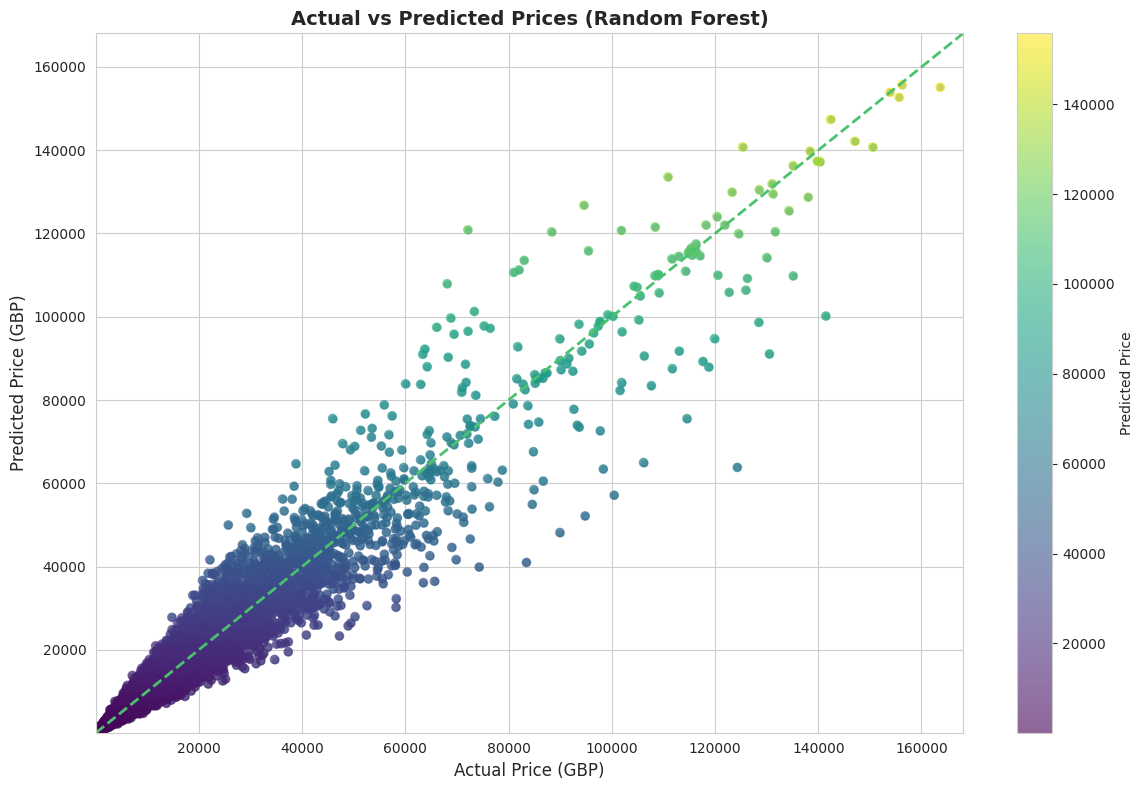


Feature Importances:
Mileage: 0.0852
Year of manufacture: 0.6225
Engine size: 0.2923


In [ ]:
# main function to carry out the regression analysis
def random_forest_regression_analysis(car_sales_df, feature_names, target_name="Price"):
    X_train, X_test, y_train, y_test = prepare_and_split_data(car_sales_df, feature_names, target_name)

    X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

    model = train_model(X_train_scaled, y_train)

    mae, mse, rmse, r2, y_pred = evaluate_model(model, X_test_scaled, y_test)

    price_range = (car_sales_df[target_name].min(), car_sales_df[target_name].max())
    visualize_predictions(y_test, y_pred, price_range)

    return model, scaler, (mae, mse, rmse, r2)

# Call the function
feature_names = ["Mileage", "Year of manufacture", "Engine size"]
model, scaler, metrics = random_forest_regression_analysis(car_sales_df, feature_names)

print("\nFeature Importances:")
for feature, importance in zip(feature_names, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

### Multiple linear regression with all numerical and categorical features

In [ ]:
# Prepare and split data
def prepare_and_split_data(car_sales_df, numerical_features, categorical_features, target_name="Price", test_size=0.2, random_seed=26):
    # One-hot encode categorical features
    car_sales_encoded = pd.get_dummies(car_sales_df, columns=categorical_features, drop_first=True)

    # Combine numerical and encoded categorical features
    feature_columns = numerical_features + [col for col in car_sales_encoded.columns
                                            if any(cat in col for cat in categorical_features)]

    X = car_sales_encoded[feature_columns]
    y = car_sales_encoded[target_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")

    return X_train, X_test, y_train, y_test, feature_columns

# Carry out linear regression analysis
def linear_regression_analysis(car_sales_df, numerical_features, categorical_features, target_name="Price"):
    X_train, X_test, y_train, y_test, feature_columns = prepare_and_split_data(
        car_sales_df, numerical_features, categorical_features, target_name)

    X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

    model = train_model(X_train_scaled, y_train)

    mae, mse, rmse, r2, y_pred = evaluate_model(model, X_test_scaled, y_test)

    price_range = (car_sales_df[target_name].min(), car_sales_df[target_name].max())
    visualize_predictions(y_test, y_pred, price_range)

    return model, scaler, (mae, mse, rmse, r2), feature_columns

Training set: 40000 samples
Testing set: 10000 samples
Model Evaluation Metrics:
Mean Absolute Error: 290.71
Mean Squared Error: 415608.64
Root Mean Squared Error: 644.68
R-squared Score: 0.9986


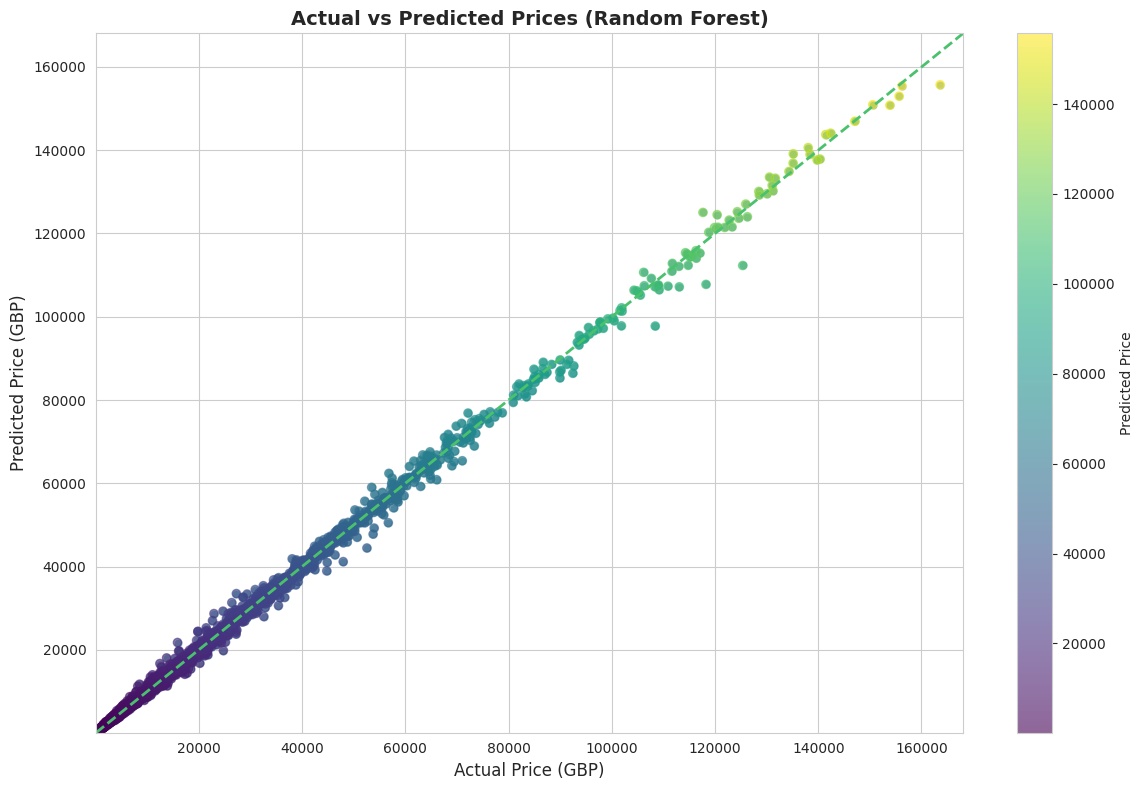

In [ ]:
# Call the function to carry out the multiple linear regression
numerical_features = ["Mileage", "Year of manufacture", "Engine size"]
categorical_features = ["Fuel type", "Model", "Manufacturer"]

model, scaler, metrics, feature_columns = linear_regression_analysis(car_sales_df, numerical_features, categorical_features)

## Build ANN model to carry out price prediction

In [ ]:
# Function to build an ANN model
def build_ann_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Train the model
def train_ann_model(model, X_train, y_train, epochs=100, batch_size=32, validation_split=0.2):
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        verbose=1
    )
    return history

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test).flatten()

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Model Evaluation Metrics:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared Score: {r2:.4f}")

    return mae, mse, rmse, r2, y_pred

# Visualise the predictions
def visualize_predictions(y_test, y_pred, price_range):
    plt.figure(figsize=(12, 8))

    sns.set_style("whitegrid")
    palette = sns.color_palette("viridis")

    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color=palette[2])
    plt.plot(price_range, price_range, color=palette[4], linestyle='--', linewidth=2)

    plt.xlabel("Actual Price (GBP)", fontsize=12)
    plt.ylabel("Predicted Price (GBP)", fontsize=12)
    plt.title("Actual vs Predicted Prices (ANN)", fontsize=14, fontweight='bold')
    plt.xlim(price_range)
    plt.ylim(price_range)

    scatter = plt.scatter(y_test, y_pred, c=y_pred, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter, label='Predicted Price')

    plt.tight_layout()
    plt.show()

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Training set: 40000 samples
Testing set: 10000 samples
Epoch 1/100
1000/1000 [==============================] - 6s 4ms/step - loss: 198469616.0000 - val_loss: 43442044.0000
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 38236460.0000 - val_loss: 24706818.0000
Epoch 3/100
1000/1000 [==============================] - 6s 6ms/step - loss: 28063808.0000 - val_loss: 18086450.0000
Epoch 4/100
1000/1000 [==============================] - 6s 6ms/step - loss: 22950952.0000 - val_loss: 13900353.0000
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 19206988.0000 - val_loss: 11582568.0000
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 16905592.0000 - val_loss: 9020599.0000
Epoch 7/100
1000/1000 [==============================] - 4s 4ms/step - loss: 15239989.0000 - val_loss: 7494732.0000
Epoch 8/100
1000/1000 [==============================] - 4s 4ms/step - loss: 14391093.0000 - val_loss: 6182041.5000
Epoch 9/100

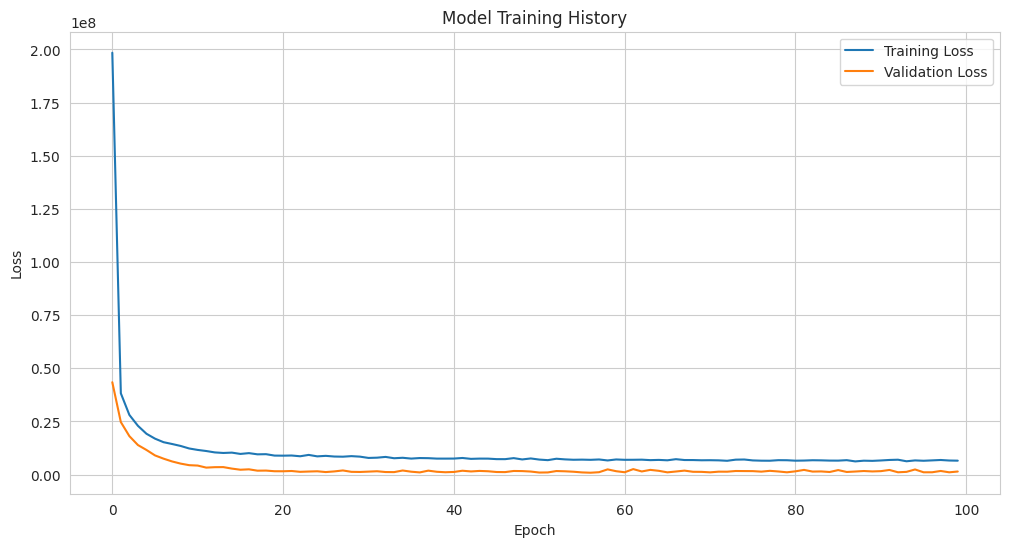

313/313 [==============================] - 1s 1ms/step
Model Evaluation Metrics:
Mean Absolute Error: 836.83
Mean Squared Error: 1458058.46
Root Mean Squared Error: 1207.50
R-squared Score: 0.9949


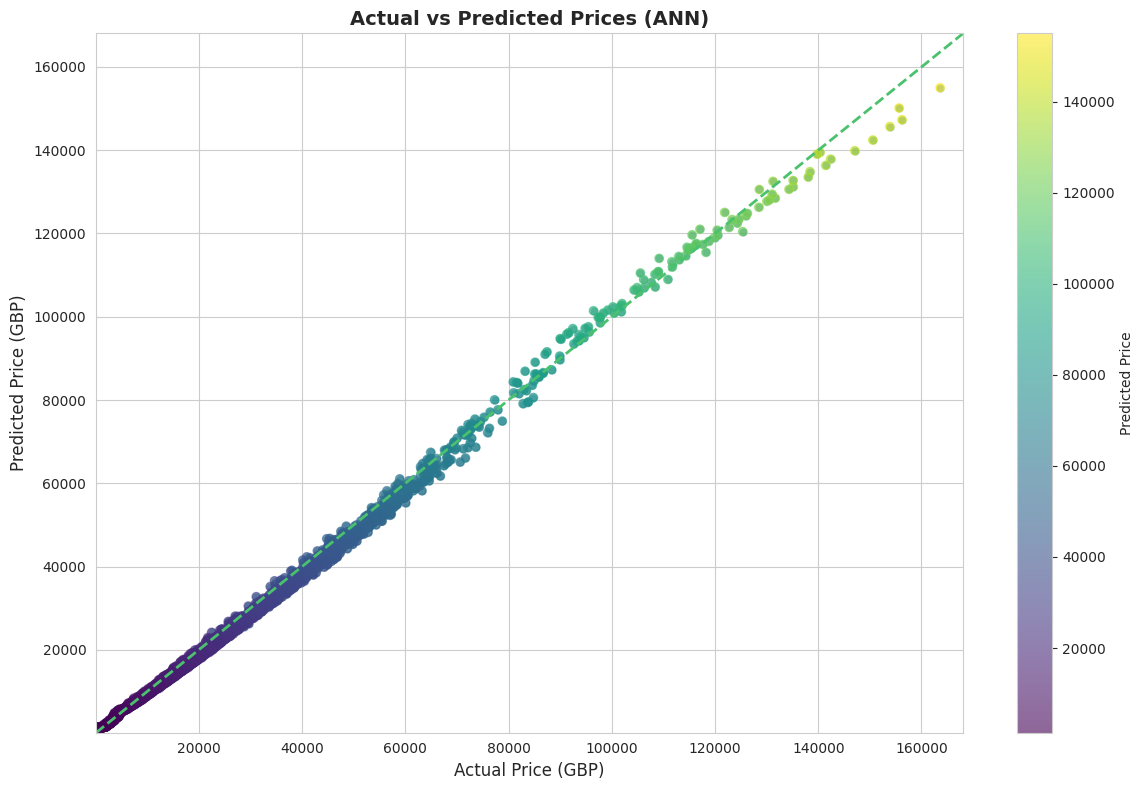

In [ ]:
# Main function to carry out price predictions on test data
def ann_price_prediction(car_sales_df, numerical_features, categorical_features, target_name="Price"):
    X_train, X_test, y_train, y_test, feature_columns = prepare_and_split_data(
        car_sales_df, numerical_features, categorical_features, target_name)

    X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

    model = build_ann_model(input_dim=X_train_scaled.shape[1])

    history = train_ann_model(model, X_train_scaled, y_train)

    plot_training_history(history)

    mae, mse, rmse, r2, y_pred = evaluate_model(model, X_test_scaled, y_test)

    price_range = (car_sales_df[target_name].min(), car_sales_df[target_name].max())
    visualize_predictions(y_test, y_pred, price_range)

    return model, scaler, (mae, mse, rmse, r2), feature_columns

# Call the function
model, scaler, metrics, feature_columns = ann_price_prediction(car_sales_df, numerical_features, categorical_features)

Streaming output truncated to the last 5000 lines.
2000/2000 [==============================] - 4s 2ms/step - loss: 6342555.5000 - val_loss: 3513939.5000
Epoch 20/100
2000/2000 [==============================] - 4s 2ms/step - loss: 5580905.5000 - val_loss: 5919408.5000
Epoch 21/100
2000/2000 [==============================] - 6s 3ms/step - loss: 5020880.5000 - val_loss: 11777650.0000
Epoch 22/100
2000/2000 [==============================] - 4s 2ms/step - loss: 4554013.5000 - val_loss: 10462093.0000
Epoch 23/100
2000/2000 [==============================] - 4s 2ms/step - loss: 4798104.5000 - val_loss: 19920906.0000
Epoch 24/100
2000/2000 [==============================] - 6s 3ms/step - loss: 4591387.5000 - val_loss: 22987010.0000
Epoch 25/100
2000/2000 [==============================] - 4s 2ms/step - loss: 4941406.5000 - val_loss: 16042844.0000
Epoch 26/100
2000/2000 [==============================] - 4s 2ms/step - loss: 4447814.5000 - val_loss: 25663528.0000
Epoch 27/100
2000/2000 [====

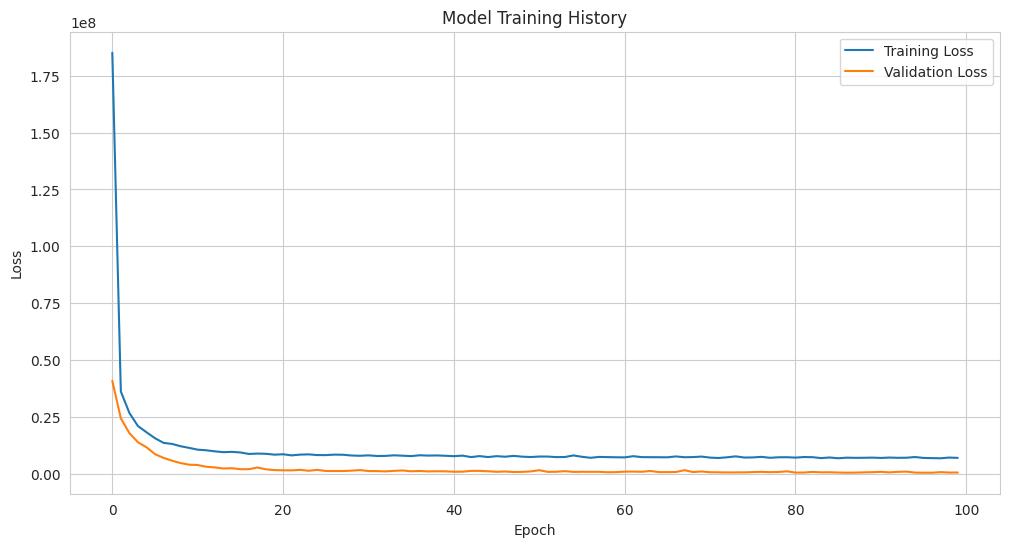

313/313 [==============================] - 0s 1ms/step
Model Evaluation Metrics:
Mean Absolute Error: 492.63
Mean Squared Error: 533836.83
Root Mean Squared Error: 730.64
R-squared Score: 0.9981


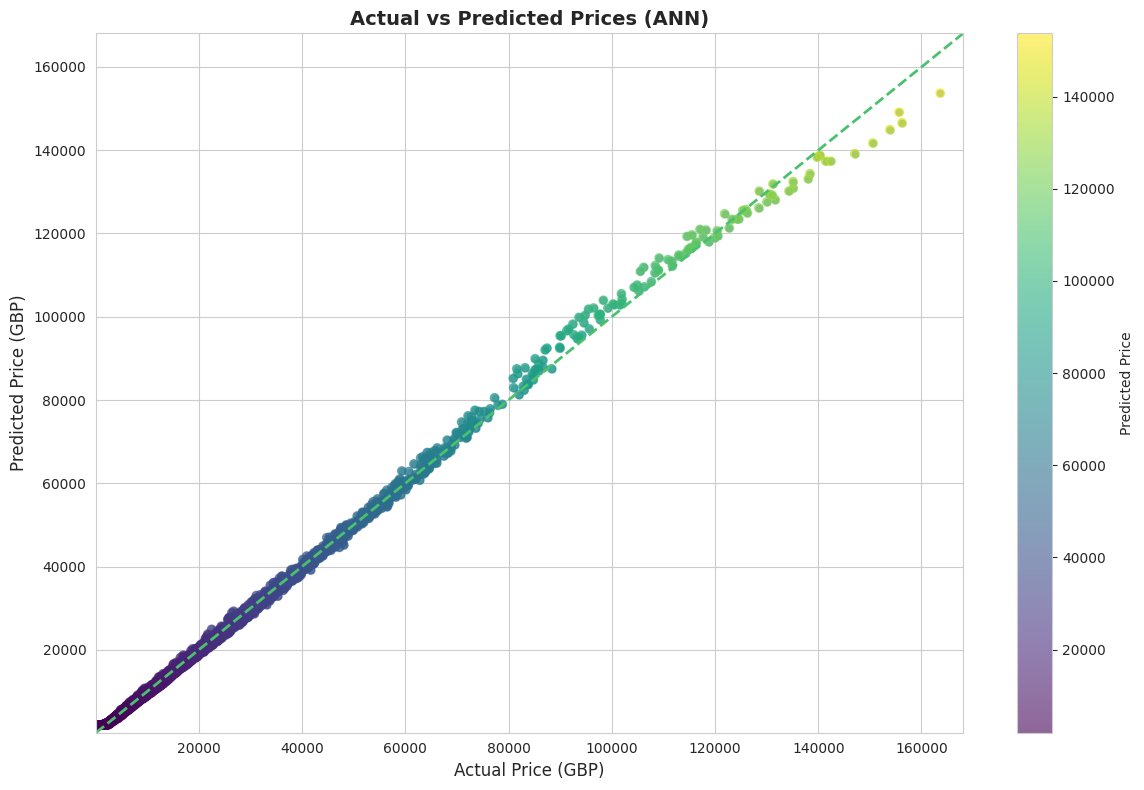

In [ ]:
# Tune hyperparameters
batch_sizes = [16, 32, 64]
epochs = [50, 100, 150]
learning_rates = [0.001, 0.005, 0.01]

best_mae = 100000  # Initialize with a large value
best_model = None
best_params = {}

# Prepare and split data here, before the tuning loop
X_train, X_test, y_train, y_test, feature_columns = prepare_and_split_data(
    car_sales_df, numerical_features, categorical_features, target_name="Price")

# Scale features here as well
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

for batch_size in batch_sizes:
    for epoch in epochs:
        for learning_rate in learning_rates:
            model = build_ann_model(input_dim=X_train_scaled.shape[1])
            model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
            history = train_ann_model(model, X_train_scaled, y_train, epochs=epoch, batch_size=batch_size)
            mae, mse, rmse, r2, y_pred = evaluate_model(model, X_test_scaled, y_test)
            if mae < best_mae:
                best_mae = mae
                best_model = model
                best_params = {
                    'batch_size': batch_size,
                    'epochs': epoch,
                    'learning_rate': learning_rate
                }

print("Best Model Parameters:")
print(best_params)

# Call the best model again
best_model, scaler, metrics, feature_columns = ann_price_prediction(car_sales_df, numerical_features, categorical_features)

## Clustering Algorithms

In [ ]:
# K-Means clustering with Year of Manufacture

In [ ]:
# Extract input features
feature_names = ["Year of manufacture", "Price"]

x = car_df[feature_names]

# Import standard scaler class

from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x)

# Apply the standard scaler to x
x_scaled = scale.transform(x)

In [ ]:
%%capture
# Import the k-Means model
from sklearn.cluster import KMeans

# Create a list to record the inertia
# for each value of k.
inertia = []
# Define the range of values of k
# that we will use.
k_range = range(1, 11)

# Loop through the possible values of k
for k in k_range:
  # Initialise the model
  kmeans = KMeans(n_clusters = k, random_state = 42)
  # Fit the model to the scaled data
  kmeans.fit(x_scaled)
  # Record the inertia
  inertia.append(kmeans.inertia_)

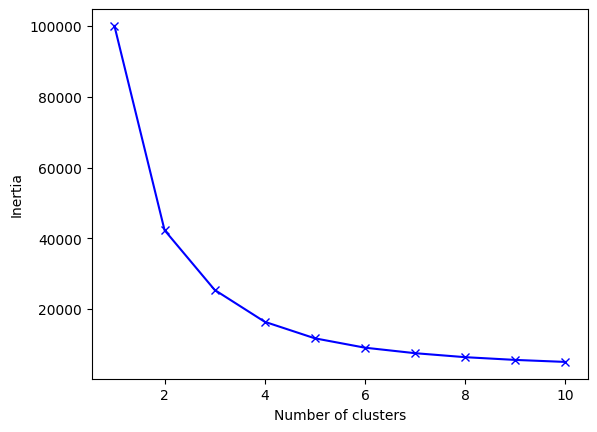

In [ ]:
# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the figure
plt.show()

In [ ]:
# The optimal value of k corresponds to the elbow point which may be 2 or 3 from the above plot

In [ ]:
# Fit the final k-Means model
# with our chosen k=3
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Evaluate the metrics of the clustering

# Import the internal measures
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.6866
Silhouette Coefficient: 0.5139


In [ ]:
# Better clustering happens when the Davies Bouldin Index is low and the Silhouette Coeffiecient is high (closer to 1)
# The Silhoette coefficient here looks good as it is relatively close to 1

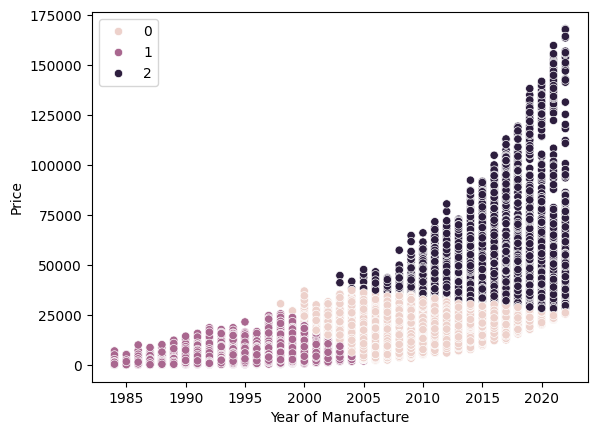

In [ ]:
# Visualise the clusters in a scatter plot
sns.scatterplot(data = car_df, x = "Year of manufacture", y = "Price", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "upper left")
# Label both axes
plt.xlabel("Year of Manufacture")
plt.ylabel("Price")
# Show the figure
plt.show()

In [ ]:
# There are three clusters here
# - Cars with low price, manufactured between 1980 and 2005
# - Cars with average price, manufactured between 1997 and 2023
# - Cars with high price, manufactured between 2003 and 2023

In [ ]:
# K-Means clustering with  Engine size

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

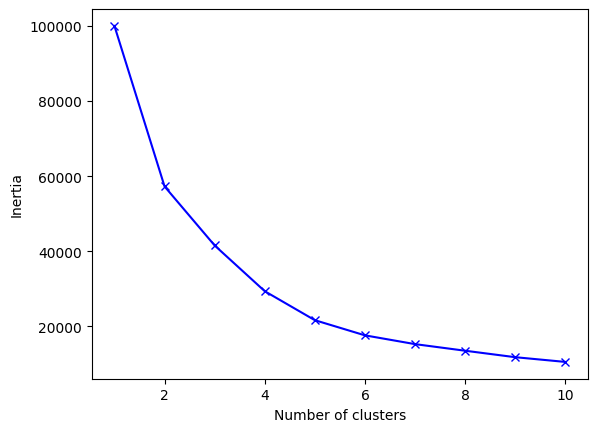

In [ ]:
# Extract input features
feature_names = ["Engine size", "Price"]

x = car_df[feature_names]

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x)

# Apply the standard scaler to x
x_scaled = scale.transform(x)

inertia = []
# Loop through the possible values of k
for k in k_range:
  # Initialise the model
  kmeans = KMeans(n_clusters = k, random_state = 42)
  # Fit the model to the scaled data
  kmeans.fit(x_scaled)
  # Record the inertia
  inertia.append(kmeans.inertia_)

# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the figure
plt.show()

In [ ]:
# The optimal number of clusters here appears to be 4 and so we use this

In [ ]:
# Fit the final k-Means model
# with our chosen k=4
kmeans_final = KMeans(n_clusters = 4, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

# Evaluate the metrics of the clustering

# Import the internal measures
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies Bouldin Index: 0.7636
Silhouette Coefficient: 0.4929


In [ ]:
# This model appears to be worse than the previous one from the Davies Boulding index and the Silhouette Coefficient

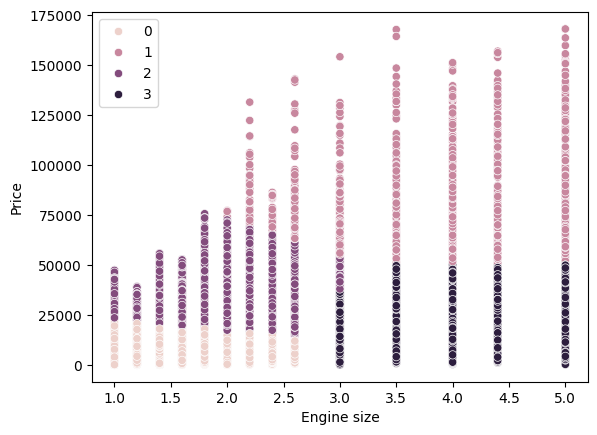

In [ ]:
# Visualise the clusters in a scatter plot
sns.scatterplot(data = car_df, x = "Engine size", y = "Price", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "upper left")
# Label both axes
plt.xlabel("Engine size")
plt.ylabel("Price")
# Show the figure
plt.show()

In [ ]:
# There are four clusters here
# - Cars with low price and smaller engines
# - Cars with low price and bigger engines
# - Cars with average price and smaller engines
# - Cars with high price and small to large engines

In [ ]:
# K-Means clustering with  Mileage

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

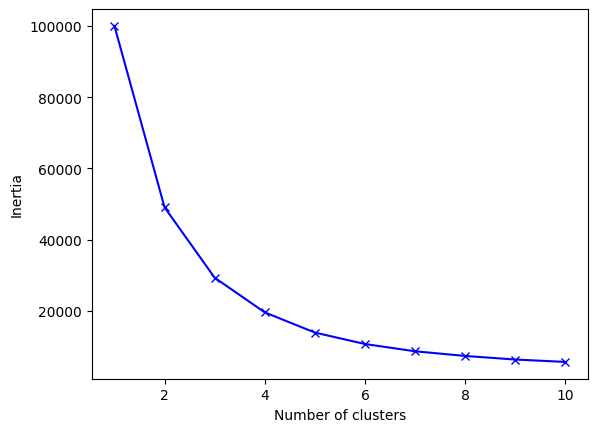

In [ ]:
# Extract input features
feature_names = ["Mileage", "Price"]

x = car_df[feature_names]

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x)

# Apply the standard scaler to x
x_scaled = scale.transform(x)

inertia = []
# Loop through the possible values of k
for k in k_range:
  # Initialise the model
  kmeans = KMeans(n_clusters = k, random_state = 42)
  # Fit the model to the scaled data
  kmeans.fit(x_scaled)
  # Record the inertia
  inertia.append(kmeans.inertia_)

# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
# Label the axes
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
# Show the figure
plt.show()

In [ ]:
# The optimal number of clusters here appears to be 3 and so we use this

In [ ]:
# Fit the final k-Means model
# with our chosen k=4
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

# Evaluate the metrics of the clustering

# Import the internal measures
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies Bouldin Index: 0.6870
Silhouette Coefficient: 0.4786


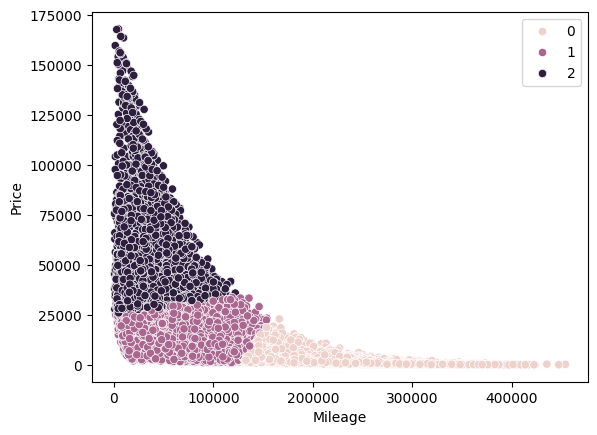

In [ ]:
# Visualise the clusters in a scatter plot
sns.scatterplot(data = car_df, x = "Mileage", y = "Price", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "upper right")
# Label both axes
plt.xlabel("Mileage")
plt.ylabel("Price")
# Show the figure
plt.show()

In [ ]:
# There are three clusters here
# - Cars with low price and low mileage
# - Cars with low price and high mileage
# - Cars with high price and high mileage

### Hierarchical clustering with various combination of features

In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
 # Extract the input features
feature_names = ["Year of manufacture", "Price"]
x = car_df[feature_names]

# Scale the input features
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

In [ ]:
# We use the same number of clusters as we used with the k-means which is 3 clusters

In [ ]:
# Import the AgglomerativeClustering model from
# the sklearn library.
from sklearn.cluster import AgglomerativeClustering
# Create an instance of the AgglomerativeClustering
# class, with 3 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
# We can now fit this model to our dataset. The following
# will both fit the model and output the predicted cluster
# labels.
agg_labels_pred = agg_model.fit_predict(x_scaled)

In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, agg_labels_pred)
# Print the results
print("Davies Bouldin index: %.4f" % (db_score, ))
print("Silhouette coefficient: %.4f" % (s_score, ))

Davies Bouldin Score: 0.4639
Silhouette Score: 0.6377


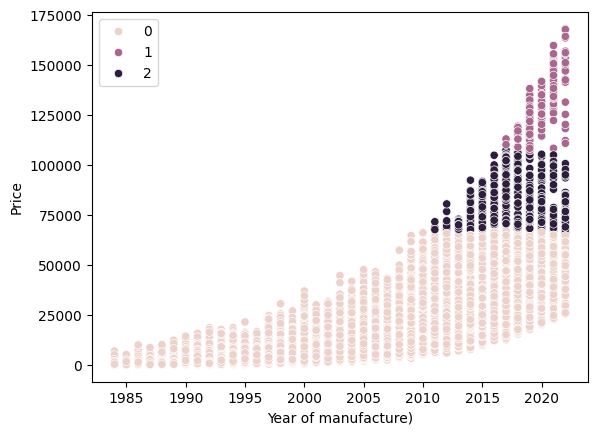

In [ ]:
# Visualise the clusters in a scatter plot of Life expectancy versus GDP
sns.scatterplot(data = car_df, x = "Year of manufacture", y = "Price", hue = agg_labels_pred)
# Label both axes
plt.xlabel("Year of manufacture)")
plt.ylabel("Price")
# Show the figure
plt.show()